#Data Inspection for AirBnB Dataset

1. Basic Structure (# of Rows and Columns)

2. Missing Values
  - By column
  - By City

3. Data Types

4. Unique Values by Column

5. Calendar - Summary Statistics for Numeric Columns

6. Calendar - Price and Adjusted Price Difference



# EDA Plots for AirBnB Dataset - Calendar

1. Mean Price Change Over Time

2. Mean Adjusted Price Change Over Time

3. Average Price by Availability

4. Availability Count for Each Day

## Function for the Inspection

### 1. Simple EDA

**Purpose:**
The simple_eda function is designed to perform a basic exploratory data analysis (EDA) on a given DataFrame. It provides essential insights into the structure, missing values, data types, unique values, and summary statistics of the DataFrame.

Steps:
1. **Basic Structure:**

Prints the number of rows and columns in the DataFrame.

2. **Missing Values:**

Prints the count of missing values for each column in the DataFrame.

3. **Data Types:**

Prints the data types of each column in the DataFrame.

4. **Unique Values by Column:**

Prints the number of unique values for each column in the DataFrame.

5. **Summary Statistics for Numerical Columns:**

Provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns in the DataFrame.

6. **Details on Categorical Columns:**

For each categorical column (object or category dtype), prints the unique values.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

In [7]:
def simple_eda(df):
    # Set display format to avoid scientific notation, adjust precision as needed
    pd.set_option('display.float_format', lambda x: '%.3f' % x)

    # Basic structure
    print("Basic Structure:")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}\n")

    # Missing values
    print("Missing Values by Column:")
    print(df.isnull().sum(), "\n")

    # Data types
    print("Data Types:")
    print(df.dtypes, "\n")

    # Unique values by column
    print("Unique Values by Column:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()}")
    print("\n")

    # Summary statistics for numerical columns
    print("Summary Statistics for Numerical Columns:")
    print(df.describe(), "\n")

    # Details on categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("Categorical Columns Details:")
        for col in categorical_cols:
            print(f"Column '{col}' unique values:")
            print(df[col].unique())
    else:
        print("No categorical columns found.")


## Calendar Dataset

### Price Stats Function - Calendar Dataset

This function output the dollar value columns statistics.

In [21]:
ashville = pd.read_csv('calendar-ashville.csv')
austin = pd.read_csv('calendar-austin.csv')
bozeman = pd.read_csv('calendar-bozeman.csv')
broward = pd.read_csv('calendar-broward.csv')
cambridge = pd.read_csv('calendar-cambridge.csv')
chicago = pd.read_csv('calendar-chicago.csv')
nashville = pd.read_csv('calendar-nashville.csv')

In [19]:
def calculate_price_stats(df):
    """
    Calculate maximum, minimum, average, and median prices from the "price" and "adjusted_price" columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing columns named "price" and "adjusted_price".

    Returns:
    - price_stats: dictionary containing the maximum, minimum, average, and median prices for both "price" and "adjusted_price".
    """
    # Convert the "price" column to numerical format
    df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
    df['adjusted_price'] = df['adjusted_price'].str.replace('[\$,]', '', regex=True).astype(float)

    # Calculate statistics for "price" column
    max_price = df['price'].max()
    min_price = df['price'].min()
    avg_price = df['price'].mean()
    median_price = df['price'].median()

    # Calculate statistics for "adjusted_price" column
    max_adjusted_price = df['adjusted_price'].max()
    min_adjusted_price = df['adjusted_price'].min()
    avg_adjusted_price = df['adjusted_price'].mean()
    median_adjusted_price = df['adjusted_price'].median()

    # Create a dictionary to store the results
    price_stats = {
        "maximum_price": max_price,
        "minimum_price": min_price,
        "average_price": avg_price,
        "median_price": median_price,
        "maximum_adjusted_price": max_adjusted_price,
        "minimum_adjusted_price": min_adjusted_price,
        "average_adjusted_price": avg_adjusted_price,
        "median_adjusted_price": median_adjusted_price
    }

    return price_stats



### Difference in Price and Adjusted Price - Calendar Dataset

In [87]:
def calculate_price_difference_stats(df):
    """
    Calculate the range of absolute price differences between 'price' and 'adjusted_price' columns
    for a given DataFrame, excluding rows where the price difference is zero.

    Parameters:
    - df: pandas DataFrame containing 'price' and 'adjusted_price' columns.

    Returns:
    - None. The function prints the absolute price difference range and the number of rows
      with non-zero absolute price differences.
    """
    # Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['adjusted_price'] = df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

    # Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
    df['price_difference'] = df['price'] - df['adjusted_price']

    # Calculate the absolute value of the price difference
    df['price_difference_abs'] = df['price_difference'].abs()

    # Filter out rows where the price difference is zero
    non_zero_diff_rows = df[df['price_difference'] != 0]

    # Calculate the range of the absolute price difference for non-zero difference rows
    price_difference_range_abs = {
        'max': non_zero_diff_rows['price_difference_abs'].max(),
        'min': non_zero_diff_rows['price_difference_abs'].min(),
        'median': non_zero_diff_rows['price_difference_abs'].median(),
        'average': non_zero_diff_rows['price_difference_abs'].mean()
    }

    # Print the absolute price difference range (excluding zero differences)
    print("Absolute Price Difference Range (Excluding Zero Differences):")
    print(price_difference_range_abs)
    print("\n")

    # Print the number of rows with non-zero absolute price differences
    print("Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):")
    print(len(non_zero_diff_rows))


In [4]:
ashville.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2023-03-19,f,$43.00,$43.00,30.0,365.0
1,6422,2023-03-20,f,$43.00,$43.00,30.0,365.0
2,6422,2023-03-21,f,$43.00,$43.00,30.0,365.0
3,6422,2023-03-22,f,$43.00,$43.00,30.0,365.0
4,6422,2023-03-23,f,$43.00,$43.00,30.0,365.0


In [6]:
austin.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2023-03-16,f,$200.00,$200.00,2.0,90.0
1,5456,2023-03-17,f,$250.00,$250.00,2.0,90.0
2,5456,2023-03-18,f,$250.00,$250.00,2.0,90.0
3,5456,2023-03-19,t,$250.00,$250.00,2.0,90.0
4,5456,2023-03-20,f,$95.00,$95.00,2.0,90.0


## Asheville North Calolina

In [8]:
simple_eda(ashville)

Basic Structure:
Number of Rows: 237524
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         1
price             1
adjusted_price    1
minimum_nights    1
maximum_nights    1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 651
date: 378
available: 2
price: 1492
adjusted_price: 1485
minimum_nights: 20
maximum_nights: 70


Summary Statistics for Numerical Columns:
        listing_id  minimum_nights  maximum_nights
count   237524.000      237523.000      237523.000
mean  12781521.836           7.130         897.164
std    5604453.178          14.019         422.158
min       6422.000           1.000           1.000
25%    7984939.000           2.000        1125.000
50%   13044705.000           2.000        1125.000
75%   17743

In [22]:
calculate_price_stats(ashville)

{'maximum_price': 6600.0,
 'minimum_price': 10.0,
 'average_price': 260.36674343116243,
 'median_price': 173.0,
 'maximum_adjusted_price': 6600.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 259.5921952821411,
 'median_adjusted_price': 174.0}

In [88]:
calculate_price_difference_stats(ashville)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 249.0, 'min': 1.0, 'median': 15.0, 'average': 21.7778955954323}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
12261


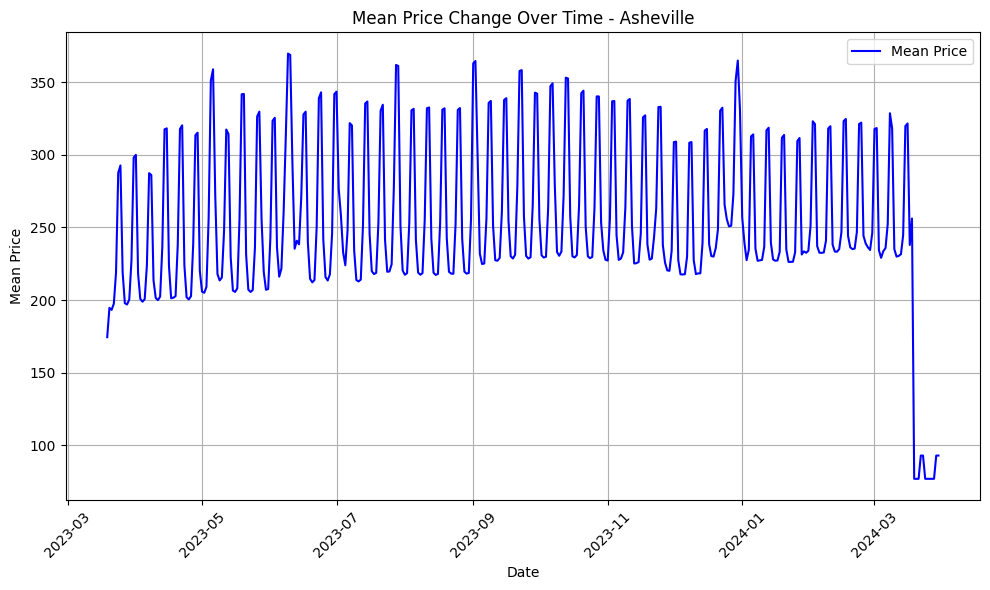

In [96]:
# Assuming you have the data in a DataFrame named calendar
ashville['date'] = pd.to_datetime(ashville['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
ashville['price'] = ashville['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = ashville.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - Asheville')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

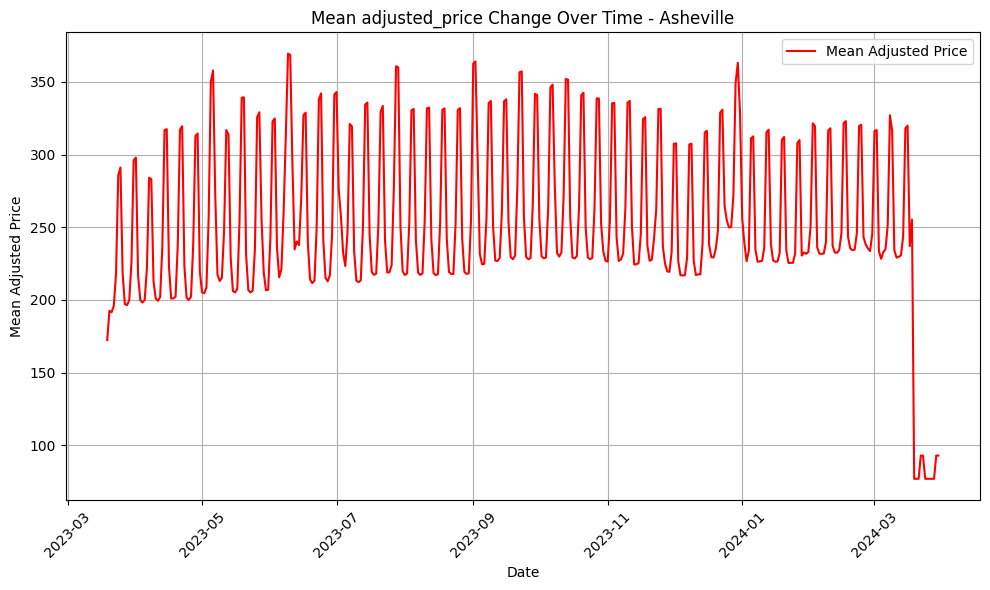

In [97]:

ashville['date'] = pd.to_datetime(ashville['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
ashville['adjusted_price'] = ashville['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = ashville.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - Asheville')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### Does Availability Change the Price?

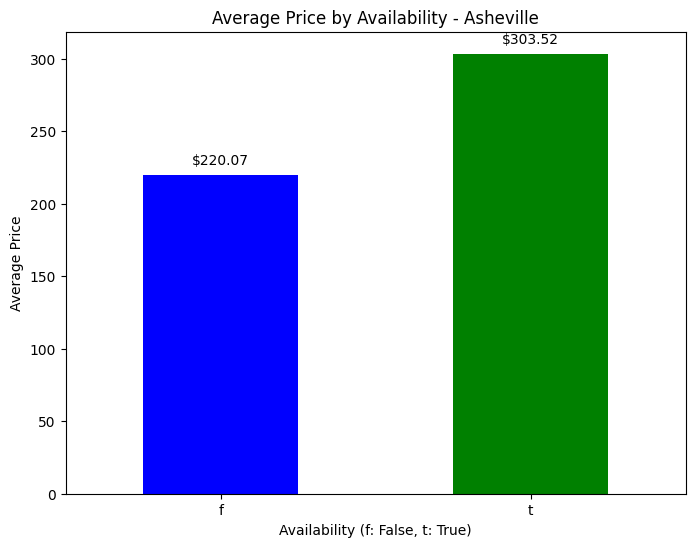

In [98]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
ashville['price'] = ashville['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = ashville.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - Asheville')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Time Series of Date and Availability

<Figure size 2000x600 with 0 Axes>

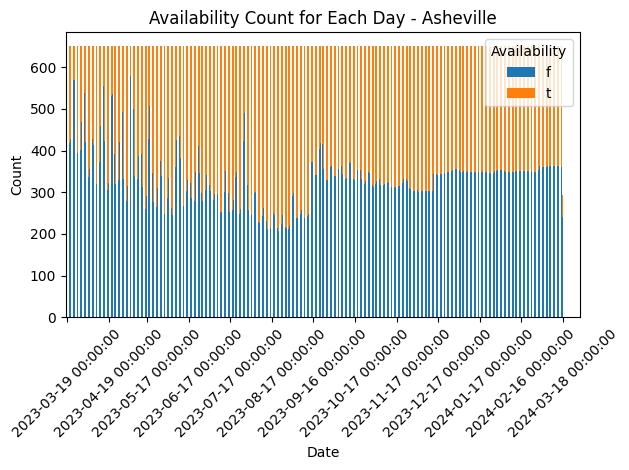

In [99]:

import matplotlib.dates as mdates

ashville['date'] = pd.to_datetime(ashville['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = ashville.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Asheville')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Austin

In [10]:
simple_eda(austin)

Basic Structure:
Number of Rows: 5243973
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      1
maximum_nights      1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 14367
date: 380
available: 2
price: 4803
adjusted_price: 4799
minimum_nights: 72
maximum_nights: 390


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            5243973.000     5243972.000     5243972.000
mean  269445108794571168.000          10.806     3674510.410
std   349573732760656192.000          41.565    88745880.520
min                 5456.000           1.000           1.000
25%             23328949.000           2.000 

In [23]:
calculate_price_stats(austin)

{'maximum_price': 65155.0,
 'minimum_price': 0.0,
 'average_price': 326.09160872206843,
 'median_price': 181.0,
 'maximum_adjusted_price': 65155.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 324.9850562626125,
 'median_adjusted_price': 180.0}

In [89]:
calculate_price_difference_stats(austin)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 2000.0, 'min': 1.0, 'median': 16.0, 'average': 41.03605906818789}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
183620


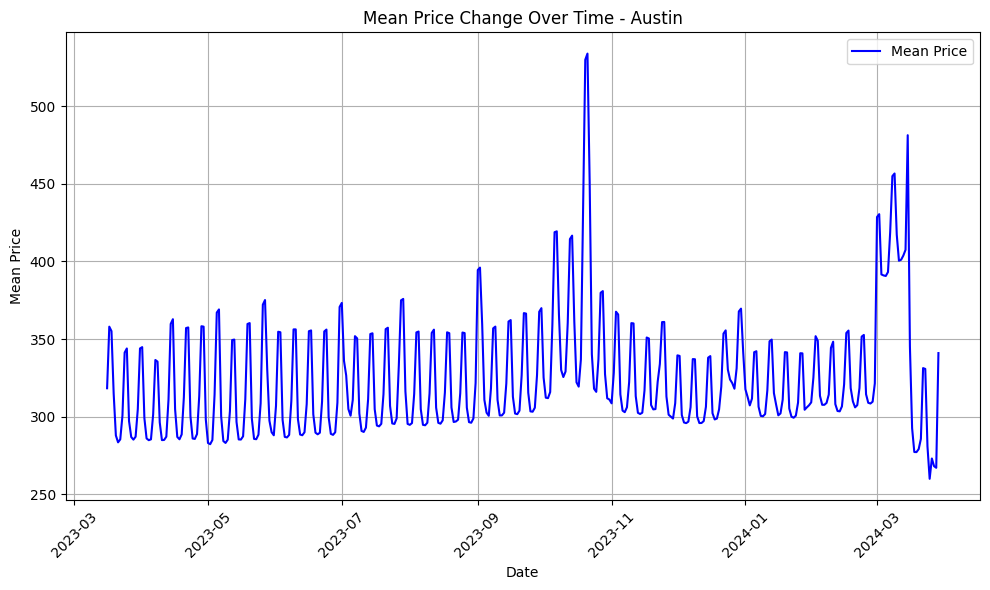

In [38]:
austin['date'] = pd.to_datetime(austin['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
austin['price'] = austin['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = austin.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - Austin')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

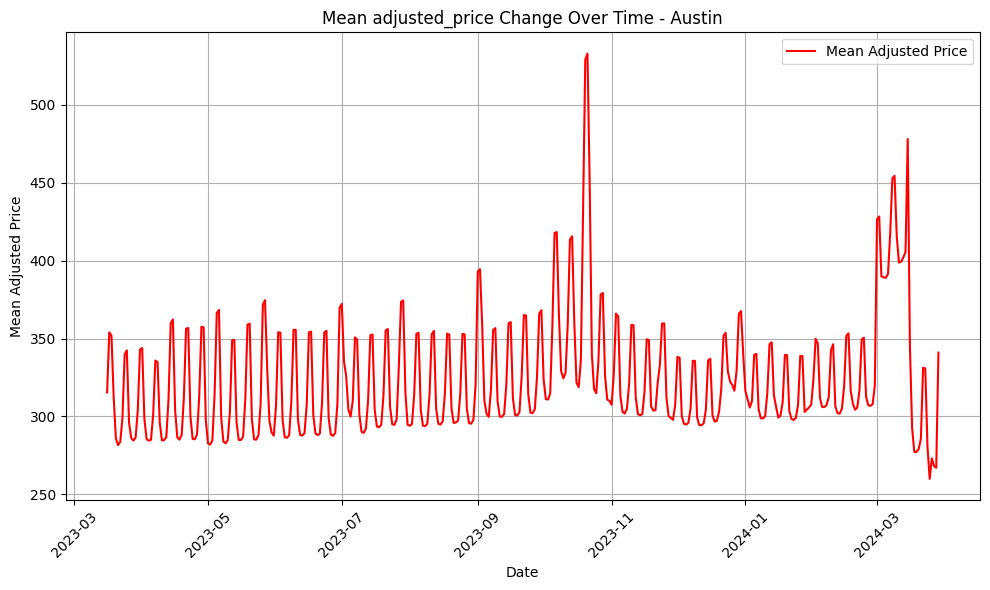

In [39]:

austin['date'] = pd.to_datetime(austin['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
austin['adjusted_price'] = austin['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = austin.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - Austin')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### Does Availability Change the Price?

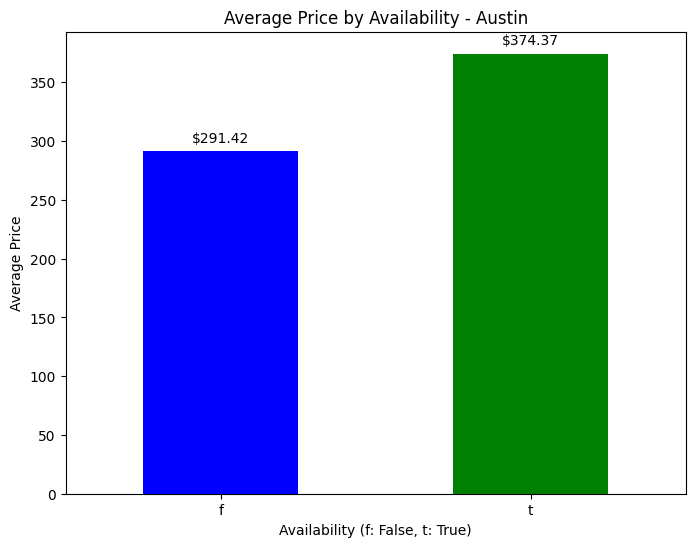

In [41]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
austin['price'] = austin['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = austin.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - Austin')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

<Figure size 2000x600 with 0 Axes>

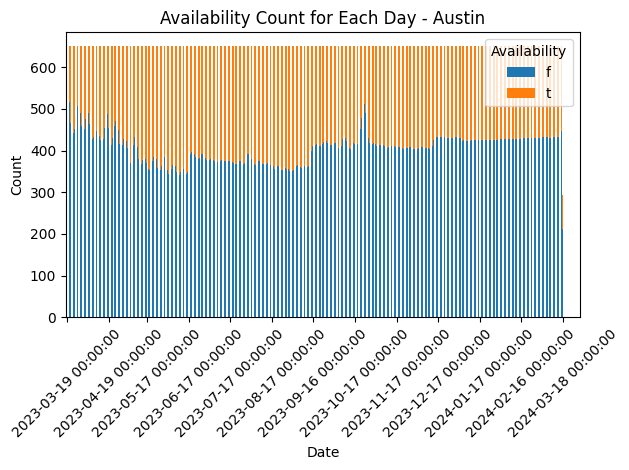

In [43]:

import matplotlib.dates as mdates

austin['date'] = pd.to_datetime(ashville['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = austin.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Austin')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Bozeman Montana

In [11]:
simple_eda(bozeman)

Basic Structure:
Number of Rows: 199290
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 546
date: 365
available: 2
price: 914
adjusted_price: 916
minimum_nights: 36
maximum_nights: 60


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count             199290.000      199290.000      199290.000
mean  304689748525692672.000           6.977         742.609
std   361762777830679936.000          12.101         478.338
min               505101.000           1.000           1.000
25%             37878272.000           2.000         365.000
50%        

In [24]:
calculate_price_stats(bozeman)

{'maximum_price': 97102.0,
 'minimum_price': 0.0,
 'average_price': 350.5219730041648,
 'median_price': 225.0,
 'maximum_adjusted_price': 97102.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 350.2307943198354,
 'median_adjusted_price': 225.0}

In [90]:
calculate_price_difference_stats(bozeman)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 150.0, 'min': 2.0, 'median': 7.0, 'average': 15.418036529680366}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
4380


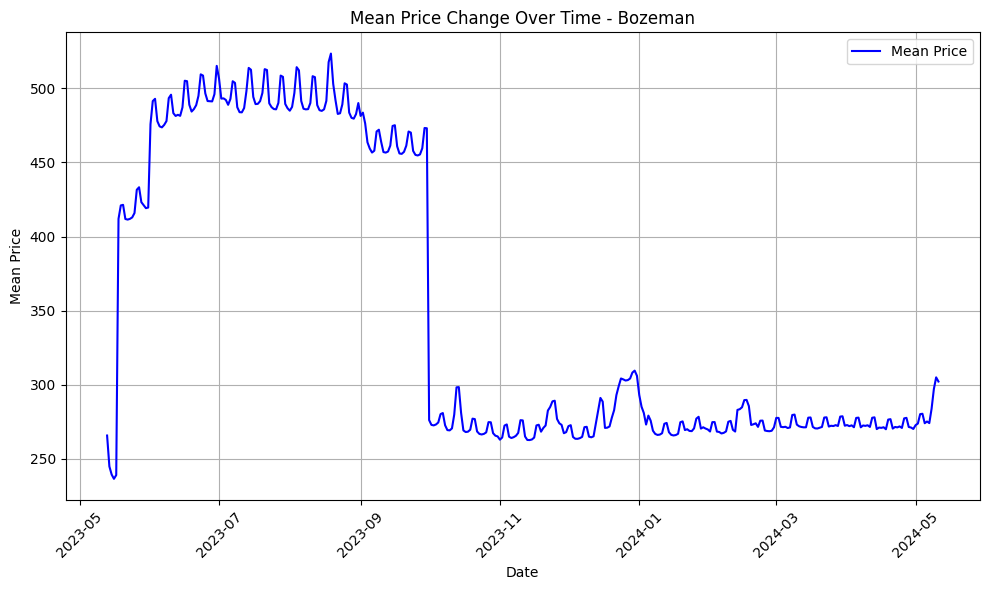

In [44]:
bozeman['date'] = pd.to_datetime(bozeman['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
bozeman['price'] = bozeman['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = bozeman.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - Bozeman')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

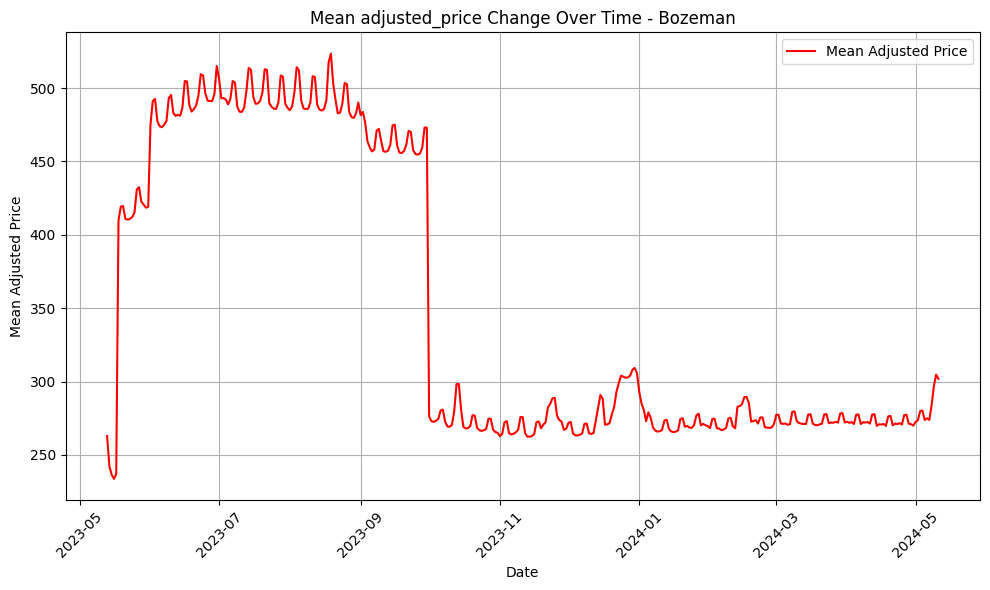

In [95]:
# Assuming you have the data in a DataFrame named bozeman
bozeman['date'] = pd.to_datetime(bozeman['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
bozeman['adjusted_price'] = bozeman['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = bozeman.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - Bozeman')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

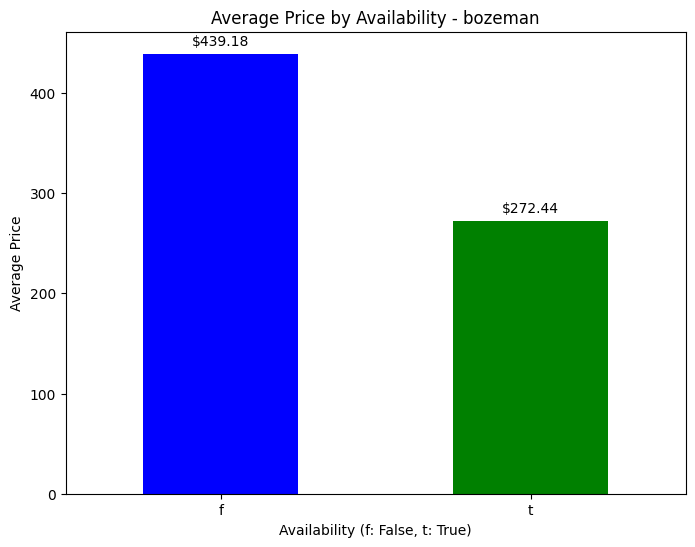

In [47]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
bozeman['price'] = bozeman['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = bozeman.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - bozeman')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

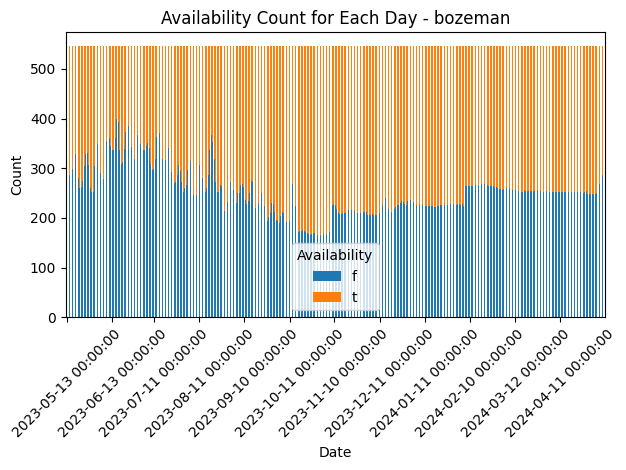

In [48]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
bozeman['date'] = pd.to_datetime(bozeman['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = bozeman.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - bozeman')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Broward Country Florida

In [12]:
simple_eda(broward)

Basic Structure:
Number of Rows: 6168116
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             682
adjusted_price    682
minimum_nights      1
maximum_nights      1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 16899
date: 371
available: 2
price: 5148
adjusted_price: 5064
minimum_nights: 81
maximum_nights: 388


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            6168116.000     6168115.000     6168115.000
mean  333473045217069760.000           5.912     1144084.721
std   361190310581044096.000          18.925    49538112.197
min                57818.000           1.000           1.000
25%             42288409.000           2.000 

In [25]:
calculate_price_stats(broward)

{'maximum_price': 100000.0,
 'minimum_price': 0.0,
 'average_price': 357.0895626933341,
 'median_price': 206.0,
 'maximum_adjusted_price': 100000.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 354.0068968715352,
 'median_adjusted_price': 204.0}

In [91]:
calculate_price_difference_stats(broward)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 4000.0, 'min': 1.0, 'median': 21.0, 'average': 47.746476839820794}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
430126


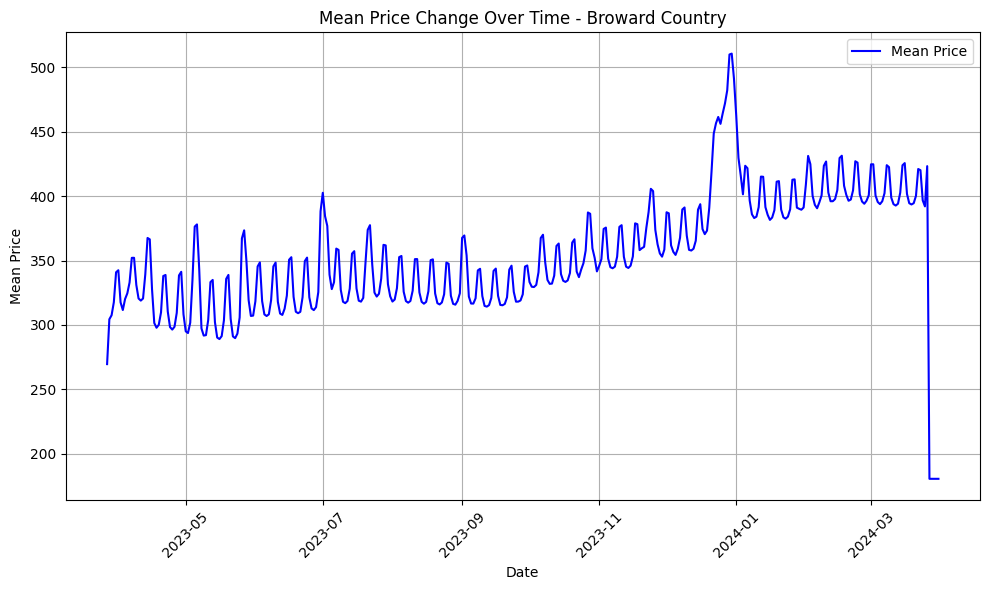

In [49]:

broward['date'] = pd.to_datetime(broward['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
broward['price'] = broward['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = broward.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - Broward Country')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

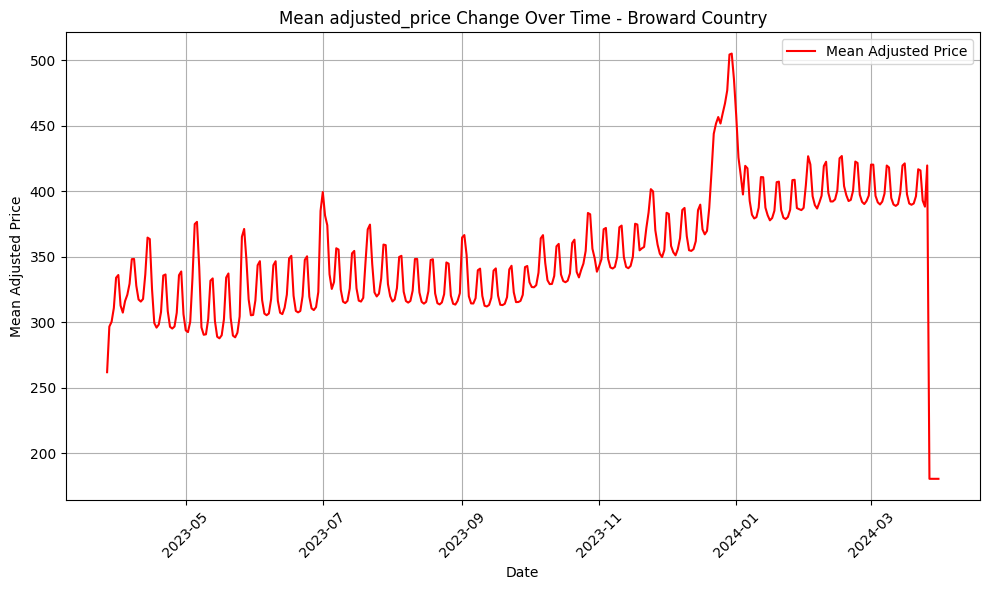

In [50]:

broward['date'] = pd.to_datetime(broward['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
broward['adjusted_price'] = broward['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = broward.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - Broward Country')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

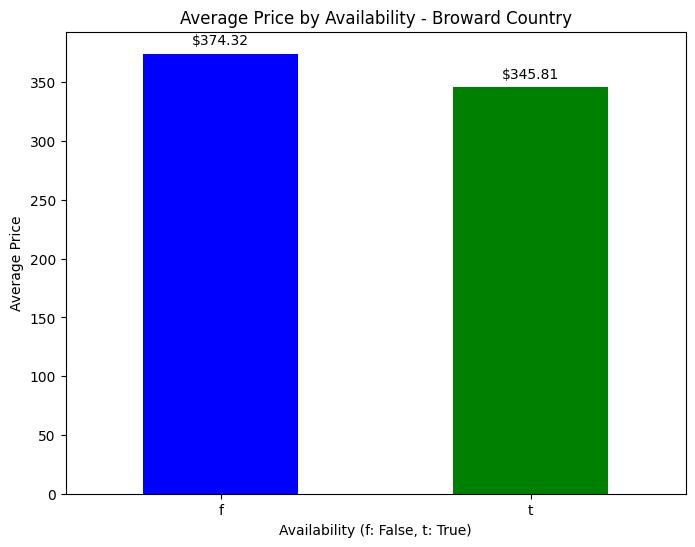

In [52]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
broward['price'] = broward['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = broward.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - Broward Country')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

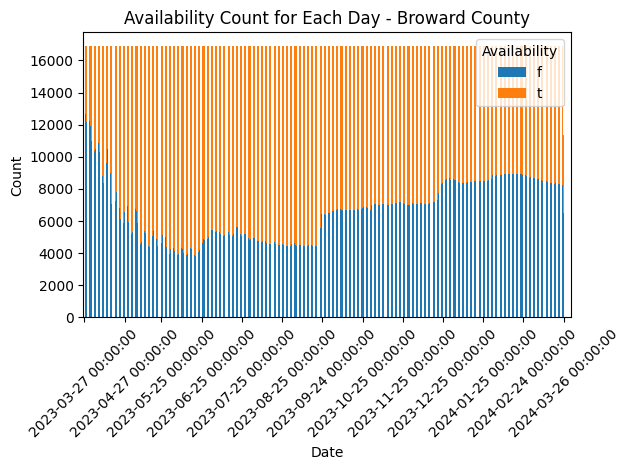

In [53]:

broward['date'] = pd.to_datetime(broward['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = broward.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Broward County')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Cambridge Massachusetts

In [13]:
simple_eda(cambridge)

Basic Structure:
Number of Rows: 374490
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 1026
date: 366
available: 2
price: 1349
adjusted_price: 1351
minimum_nights: 49
maximum_nights: 76


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count             374490.000      374490.000      374490.000
mean  216576177808038208.000          74.689         824.047
std   325978670707309504.000         124.355         613.271
min                 8521.000           1.000           1.000
25%             19346071.000           2.000         365.000
50%     

In [26]:
calculate_price_stats(cambridge)

{'maximum_price': 5837.0,
 'minimum_price': 10.0,
 'average_price': 209.53694624689578,
 'median_price': 181.0,
 'maximum_adjusted_price': 5837.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 209.4467729445379,
 'median_adjusted_price': 180.0}

In [92]:
calculate_price_difference_stats(cambridge)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 350.0, 'min': 1.0, 'median': 5.0, 'average': 12.484361518550475}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
9272


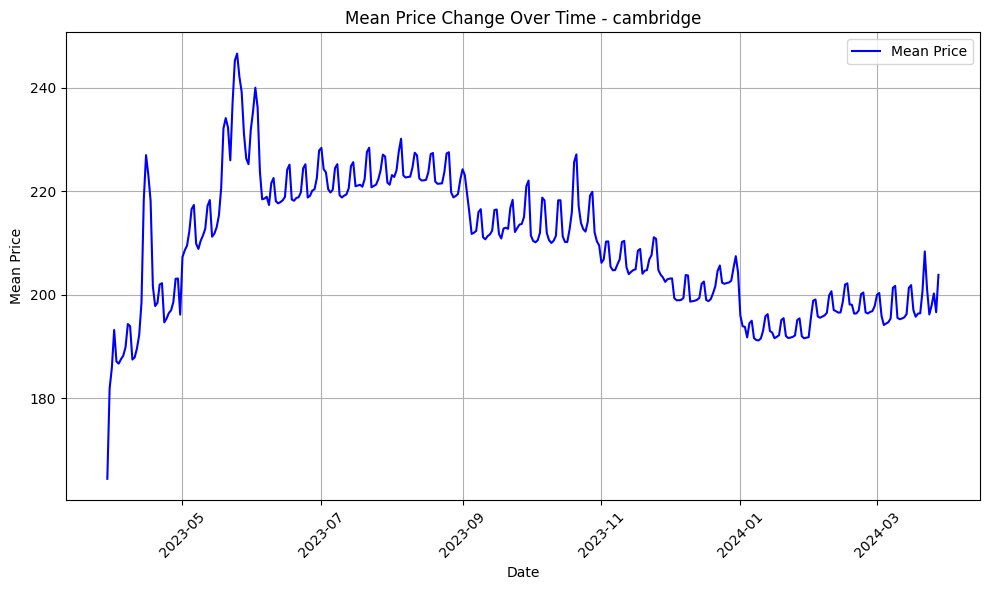

In [54]:

cambridge['date'] = pd.to_datetime(cambridge['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
cambridge['price'] = cambridge['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = cambridge.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - cambridge')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

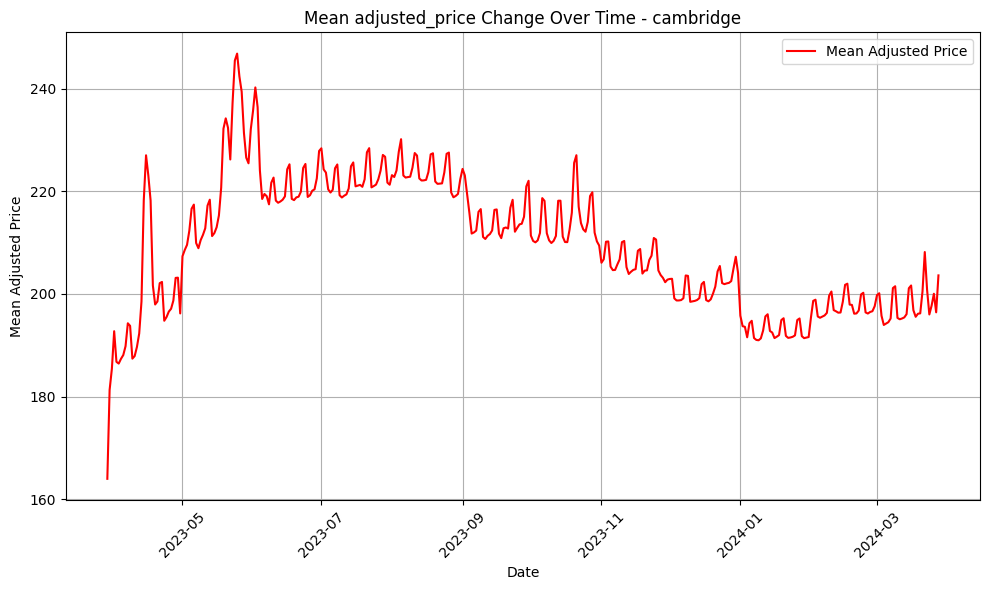

In [55]:
# Assuming you have the data in a DataFrame named calendar
cambridge['date'] = pd.to_datetime(cambridge['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
cambridge['adjusted_price'] = cambridge['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = cambridge.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - cambridge')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

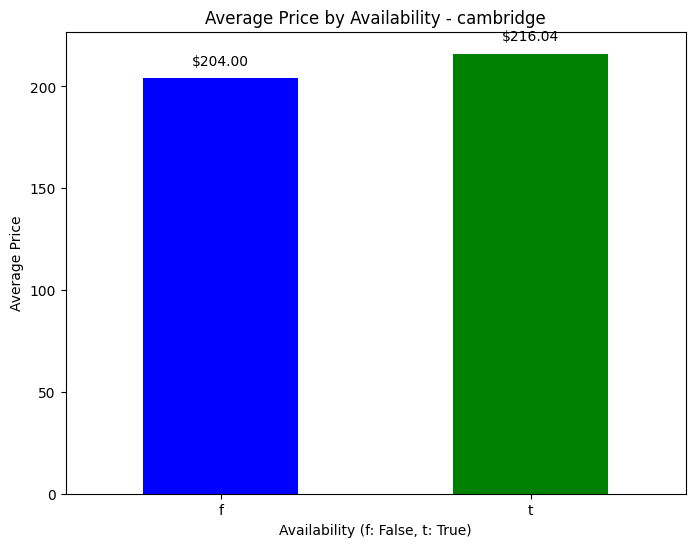

In [57]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
cambridge['price'] = cambridge['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = cambridge.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - cambridge')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

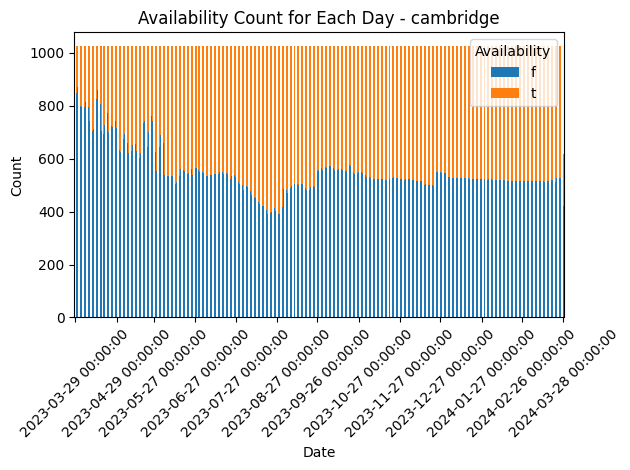

In [58]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
cambridge['date'] = pd.to_datetime(cambridge['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = cambridge.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - cambridge')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Chicago Illinois

In [14]:
simple_eda(chicago)

Basic Structure:
Number of Rows: 2827655
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      0
maximum_nights      0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 7747
date: 365
available: 2
price: 3237
adjusted_price: 3233
minimum_nights: 71
maximum_nights: 387


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            2827655.000     2827655.000     2827655.000
mean  265087152007780928.000          42.164     3247534.436
std   344838097880963072.000         104.504    83436499.491
min                 2384.000           1.000           1.000
25%             30930197.000           2.000         

In [27]:
calculate_price_stats(chicago)

{'maximum_price': 99998.0,
 'minimum_price': 0.0,
 'average_price': 222.71273966537035,
 'median_price': 146.0,
 'maximum_adjusted_price': 99998.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 223.2149667336756,
 'median_adjusted_price': 145.0}

In [93]:
calculate_price_difference_stats(chicago)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1600.0, 'min': 1.0, 'median': 24.0, 'average': 87.39892909318586}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
153499


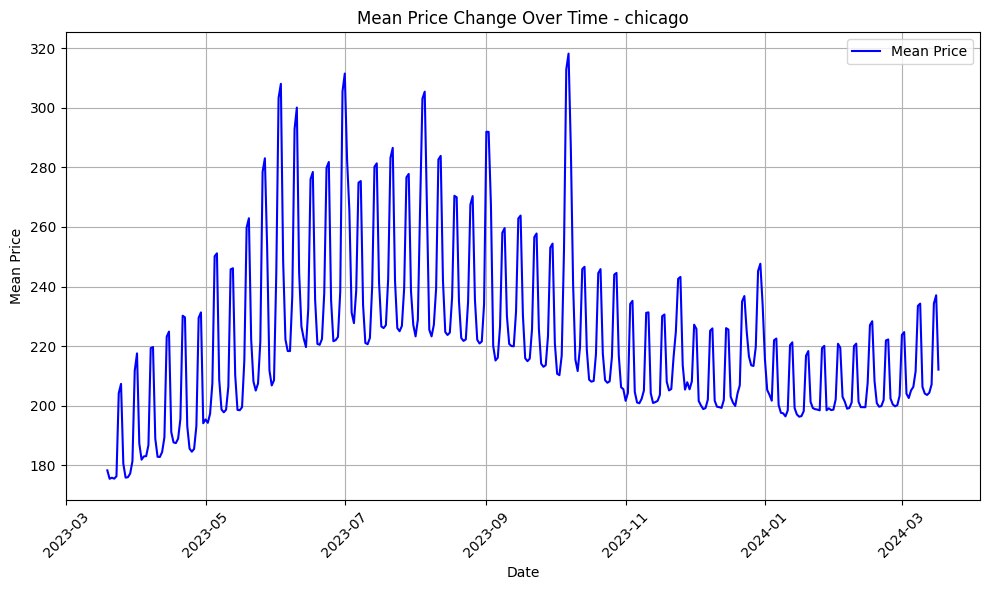

In [59]:

chicago['date'] = pd.to_datetime(chicago['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
chicago['price'] = chicago['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = chicago.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - chicago')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

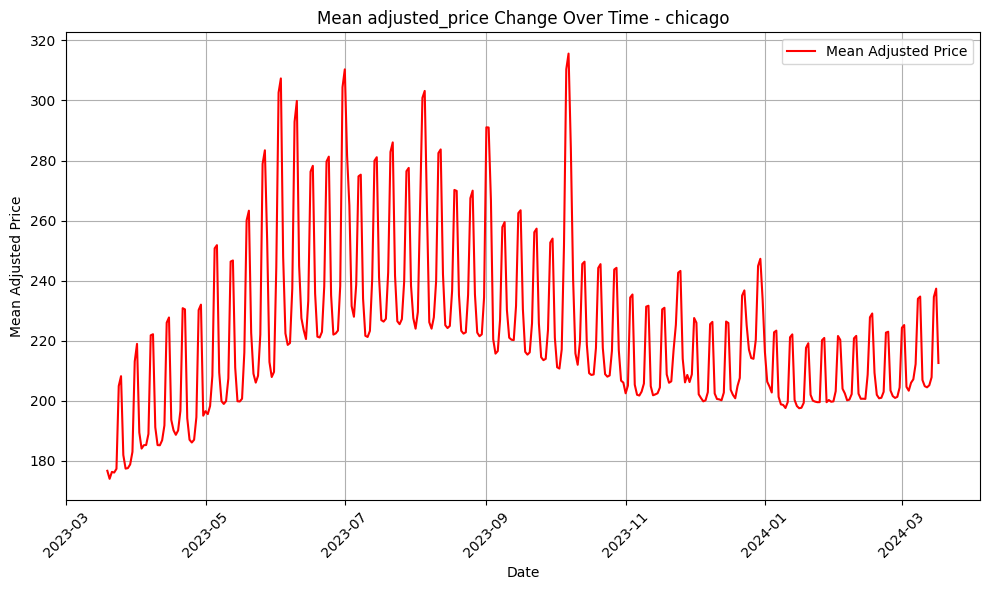

In [60]:
# Assuming you have the data in a DataFrame named chicago
chicago['date'] = pd.to_datetime(chicago['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
chicago['adjusted_price'] = chicago['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = chicago.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - chicago')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

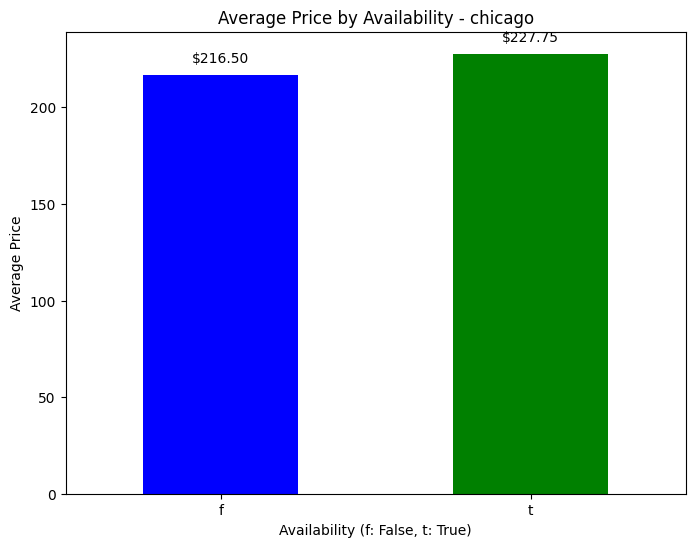

In [62]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
chicago['price'] = chicago['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = chicago.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - chicago')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

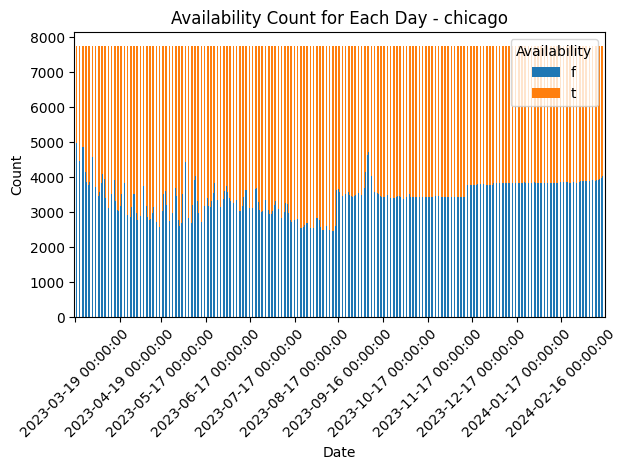

In [63]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
chicago['date'] = pd.to_datetime(chicago['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = chicago.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - chicago')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Nashville Tennessee

In [15]:
simple_eda(nashville)

Basic Structure:
Number of Rows: 729150
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         1
price             1
adjusted_price    1
minimum_nights    1
maximum_nights    1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 1998
date: 379
available: 2
price: 2822
adjusted_price: 2798
minimum_nights: 28
maximum_nights: 378


Summary Statistics for Numerical Columns:
        listing_id  minimum_nights  maximum_nights
count   729150.000      729149.000      729149.000
mean  28031372.931           6.285     5313992.406
std   12089871.623          15.938   106684714.291
min       6422.000           1.000           1.000
25%   17923122.000           1.000         365.000
50%   32886505.000           2.000        1125.000
75%   386

In [28]:
calculate_price_stats(nashville)

{'maximum_price': 78200.0,
 'minimum_price': 10.0,
 'average_price': 367.80576188725416,
 'median_price': 224.0,
 'maximum_adjusted_price': 78200.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 365.0460424648853,
 'median_adjusted_price': 223.0}

In [94]:
calculate_price_difference_stats(nashville)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1527.0, 'min': 1.0, 'median': 17.0, 'average': 41.3944486838839}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
217534


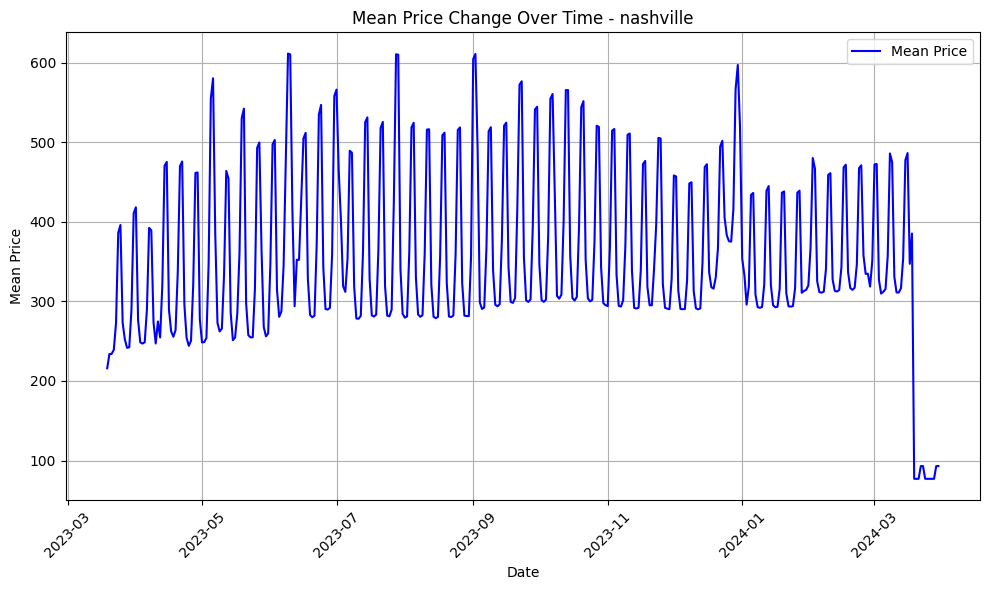

In [64]:

nashville['date'] = pd.to_datetime(nashville['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
nashville['price'] = nashville['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = nashville.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time - nashville')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

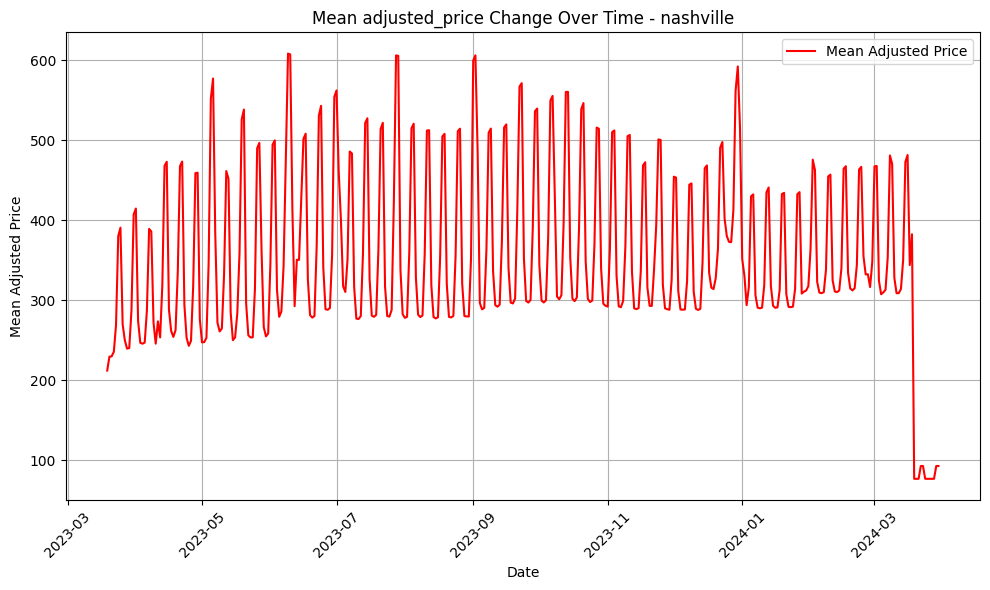

In [65]:
# Assuming you have the data in a DataFrame named nashville
nashville['date'] = pd.to_datetime(nashville['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
nashville['adjusted_price'] = nashville['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = nashville.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time - nashville')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [66]:
# Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
nashville['price'] = nashville['price'].replace('[\$,]', '', regex=True).astype(float)
nashville['adjusted_price'] = nashville['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
nashville['price_difference'] = nashville['price'] - nashville['adjusted_price']

# Display rows where there is a difference
print(len(nashville[nashville['price_difference'] != 0]))

217534


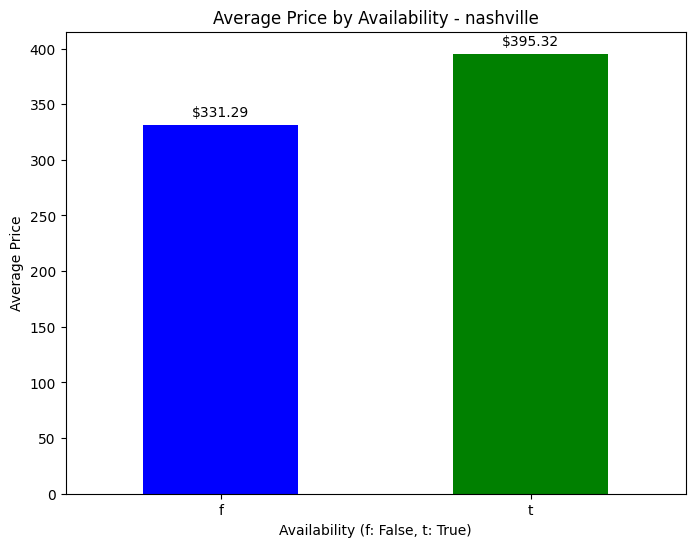

In [67]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
nashville['price'] = nashville['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = nashville.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability - nashville')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

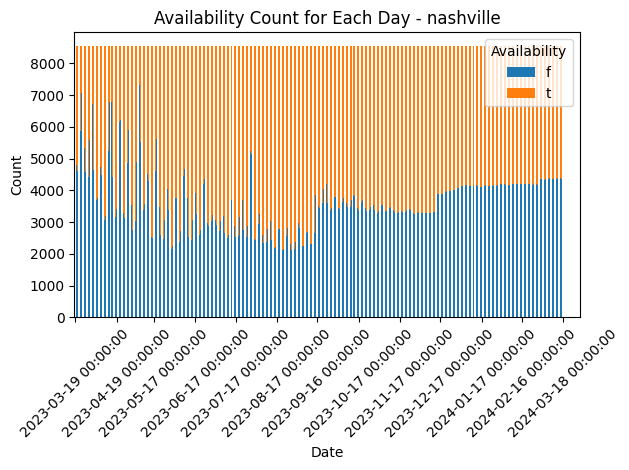

In [68]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
nashville['date'] = pd.to_datetime(nashville['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = nashville.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - nashville')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### Combined Plot for Every City

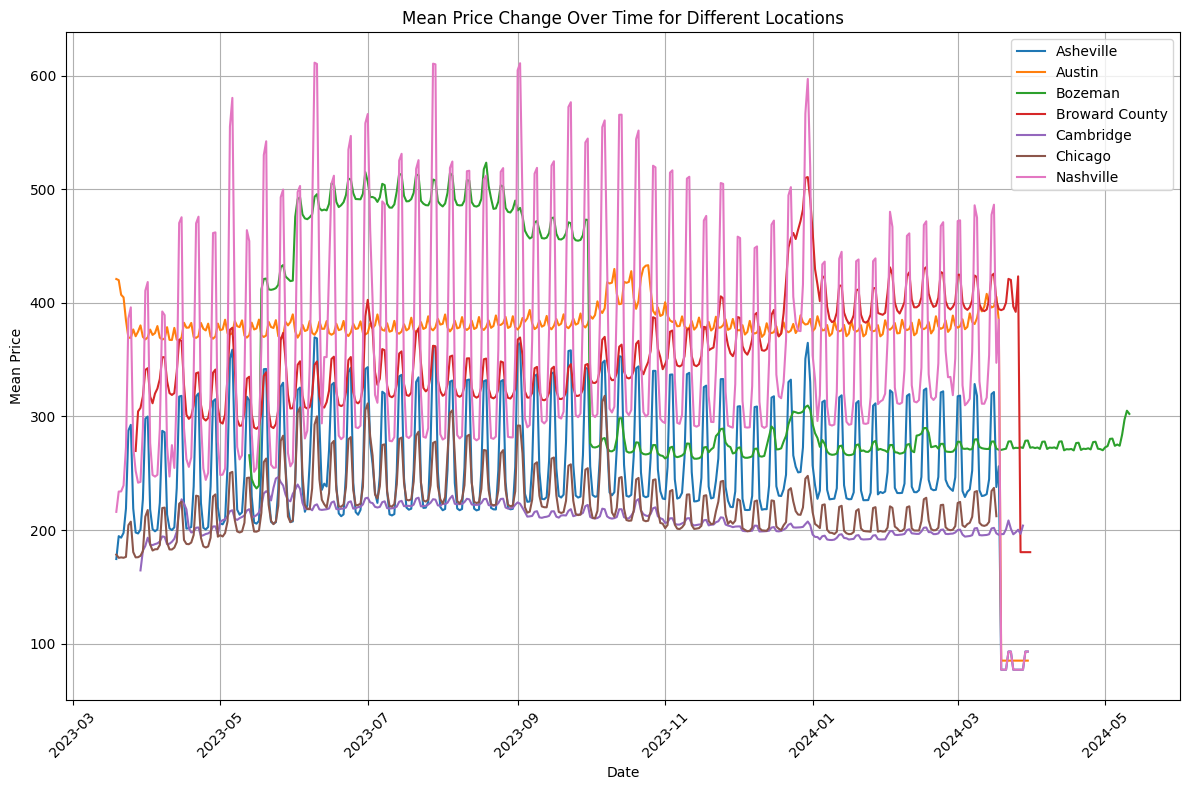

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'asheville': ashville,
    'austin': austin,
    'bozeman': bozeman,
    'broward County': broward,
    'cambridge': cambridge,
    'chicago': chicago,
    'nashville': nashville
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in location_data.items():
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Convert 'price' column to numeric after removing the dollar sign and converting to float
    data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

# Plotting
plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Price Change Over Time for Different Locations')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


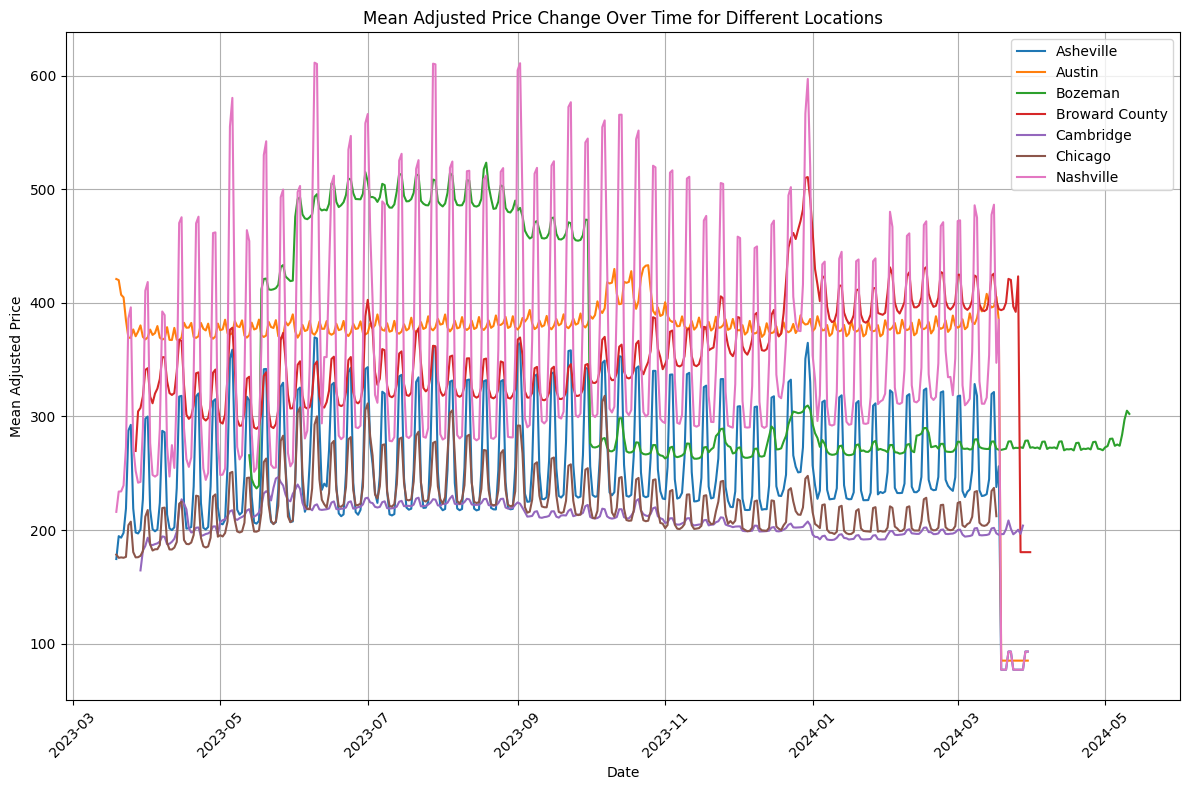

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'asheville': ashville,
    'austin': austin,
    'bozeman': bozeman,
    'broward County': broward,
    'cambridge': cambridge,
    'chicago': chicago,
    'nashville': nashville
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in location_data.items():
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Convert 'price' column to numeric after removing the dollar sign and converting to float
    data['adjusted_price'] = data['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

# Plotting
plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Adjusted Price Change Over Time for Different Locations')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


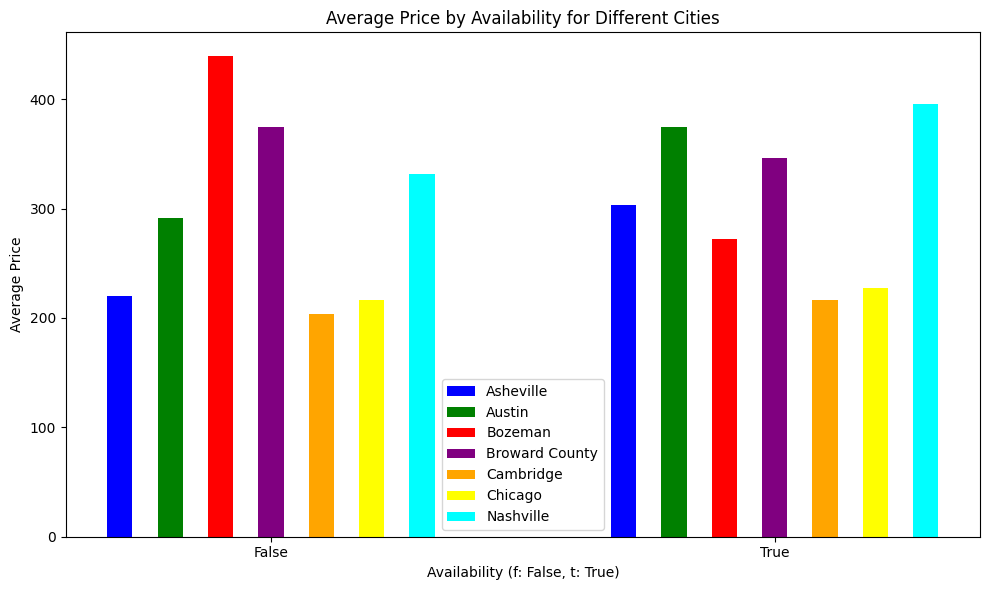

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price' column to numeric after removing the dollar sign and converting to float
ashville['price'] = ashville['price'].replace('[\$,]', '', regex=True).astype(float)
austin['price'] = austin['price'].replace('[\$,]', '', regex=True).astype(float)
bozeman['price'] = bozeman['price'].replace('[\$,]', '', regex=True).astype(float)
broward['price'] = broward['price'].replace('[\$,]', '', regex=True).astype(float)
cambridge['price'] = cambridge['price'].replace('[\$,]', '', regex=True).astype(float)
chicago['price'] = chicago['price'].replace('[\$,]', '', regex=True).astype(float)
nashville['price'] = nashville['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available_ashville = ashville.groupby('available')['price'].mean()
price_by_available_austin = austin.groupby('available')['price'].mean()
price_by_available_bozeman = bozeman.groupby('available')['price'].mean()
price_by_available_broward = broward.groupby('available')['price'].mean()
price_by_available_cambridge = cambridge.groupby('available')['price'].mean()
price_by_available_chicago = chicago.groupby('available')['price'].mean()
price_by_available_nashville = nashville.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot for ashville
plt.bar([0, 2], price_by_available_ashville.values, width=0.1, color='blue', label='Asheville')
# Plot for austin
plt.bar([0.2, 2.2], price_by_available_austin.values, width=0.1, color='green', label='Austin')
# Plot for bozeman
plt.bar([0.4, 2.4], price_by_available_bozeman.values, width=0.1, color='red', label='Bozeman')
# Plot for broward
plt.bar([0.6, 2.6], price_by_available_broward.values, width=0.1, color='purple', label='Broward County')
# Plot for cambridge
plt.bar([0.8, 2.8], price_by_available_cambridge.values, width=0.1, color='orange', label='Cambridge')
# Plot for chicago
plt.bar([1.0, 3.0], price_by_available_chicago.values, width=0.1, color='yellow', label='Chicago')
# Plot for nashville
plt.bar([1.2, 3.2], price_by_available_nashville.values, width=0.1, color='cyan', label='Nashville')

plt.title('Average Price by Availability for Different Cities')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks([0.6, 2.6], ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()


# Listings

# Neighbourhood

In [107]:
asheville = pd.read_csv('neighbourhoods-asheville.csv')
austin = pd.read_csv('neighbourhoods-austin.csv')
bozeman = pd.read_csv('neighbourhoods-bozeman.csv')
broward = pd.read_csv('neighbourhoods-broward.csv')
cambridge = pd.read_csv('neighbourhoods-cambridge.csv')
chicago = pd.read_csv('neighbourhoods-chicago.csv')
nashville = pd.read_csv('neighbourhoods-nashville.csv')

In [108]:
asheville.head(5)

,neighbourhood_group,neighbourhood
0,NaN,28704
1,NaN,28715
2,NaN,28732
3,NaN,28801
4,NaN,28803


In [109]:
austin.head(5)

,neighbourhood_group,neighbourhood
0,NaN,78701
1,NaN,78702
2,NaN,78703
3,NaN,78704
4,NaN,78705


In [110]:
simple_eda(asheville)

Basic Structure:
Number of Rows: 8
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    8
neighbourhood          0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood            int64
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 8


Summary Statistics for Numerical Columns:
       neighbourhood_group  neighbourhood
count                0.000          8.000
mean                   NaN      28771.250
std                    NaN         45.575
min                    NaN      28704.000
25%                    NaN      28727.750
50%                    NaN      28802.000
75%                    NaN      28804.250
max                    NaN      28806.000 

No categorical columns found.


In [111]:
simple_eda(austin)

Basic Structure:
Number of Rows: 44
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    44
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood            int64
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 44


Summary Statistics for Numerical Columns:
       neighbourhood_group  neighbourhood
count                0.000         44.000
mean                   NaN      78733.750
std                    NaN         16.422
min                    NaN      78701.000
25%                    NaN      78723.750
50%                    NaN      78734.500
75%                    NaN      78747.250
max                    NaN      78759.000 

No categorical columns found.


In [112]:
simple_eda(bozeman)

Basic Structure:
Number of Rows: 1
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    1
neighbourhood          0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 1


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Bozeman']


In [113]:
simple_eda(broward)

Basic Structure:
Number of Rows: 34
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    34
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 34


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Coconut Creek' 'Cooper City' 'Coral Springs' 'County Regional Facility'
 'Dania Beach' 'Davie' 'Deerfield Beach' 'Fort Lauderdale'
 'Hallandale Beach' 'Hillsboro Beach' 'Hollywood' 'Lauderdale By The Sea'
 'Lauderdale Lakes' 'Lauderhill' 'Lazy Lake' 'Lighthouse Point' 'Margate'
 'Miramar' 'North Lauderdale' 'Oakland Park' 'Parkland' 

In [114]:
simple_eda(cambridge)

Basic Structure:
Number of Rows: 13
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    13
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 13


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Agassiz' 'Area 2/MIT' 'Cambridge Highlands' 'Cambridgeport'
 'East Cambridge' 'Mid-Cambridge' 'Neighborhood Nine' 'North Cambridge'
 'Riverside' 'Strawberry Hill' 'The Port' 'Wellington-Harrington'
 'West Cambridge']


In [115]:
simple_eda(chicago)

Basic Structure:
Number of Rows: 77
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    77
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 77


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Albany Park' 'Archer Heights' 'Armour Square' 'Ashburn' 'Auburn Gresham'
 'Austin' 'Avalon Park' 'Avondale' 'Belmont Cragin' 'Beverly' 'Bridgeport'
 'Brighton Park' 'Burnside' 'Calumet Heights' 'Chatham' 'Chicago Lawn'
 'Clearing' 'Douglas' 'Dunning' 'East Garfield Park' 'East Side'
 'Edgewater' 'Edison Park' 'Englewood' 'Forest Glen

In [116]:
simple_eda(nashville)

Basic Structure:
Number of Rows: 35
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    35
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 35


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['District 1' 'District 10' 'District 11' 'District 12' 'District 13'
 'District 14' 'District 15' 'District 16' 'District 17' 'District 18'
 'District 19' 'District 2' 'District 20' 'District 21' 'District 22'
 'District 23' 'District 24' 'District 25' 'District 26' 'District 27'
 'District 28' 'District 29' 'District 3' 'District 30'

# Review

In [119]:
asheville = pd.read_csv('reviews-asheville.csv')
austin = pd.read_csv('reviews-austin.csv')
bozeman = pd.read_csv('reviews-bozeman.csv')
broward = pd.read_csv('reviews-broward.csv')
cambridge = pd.read_csv('reviews-cambridge.csv')
chicago = pd.read_csv('reviews-chicago.csv')
nashville = pd.read_csv('reviews-nashville.csv')

In [120]:
asheville.head(5)

,listing_id,date
0,108061,2011-09-21
1,108061,2011-11-01
2,108061,2011-11-13
3,108061,2012-07-21
4,108061,2012-08-19


In [121]:
simple_eda(asheville)

Basic Structure:
Number of Rows: 301842
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 2918
date: 3715


Summary Statistics for Numerical Columns:
                  listing_id
count             301842.000
mean   22779232715380076.000
std   118394469033769568.000
min               108061.000
25%             15091721.000
50%             24445744.000
75%             38825791.000
max   847297156579855104.000 

Categorical Columns Details:
Column 'date' unique values:
['2011-09-21' '2011-11-01' '2011-11-13' ... '2020-04-21' '2020-04-22'
 '2020-04-09']


In [122]:
simple_eda(austin)

Basic Structure:
Number of Rows: 512941
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 11337
date: 4347


Summary Statistics for Numerical Columns:
                  listing_id
count             512941.000
mean   59656201483386432.000
std   189465408093477536.000
min                 5456.000
25%              8780307.000
50%             23128066.000
75%             44334716.000
max   844120382867044480.000 

Categorical Columns Details:
Column 'date' unique values:
['2009-03-08' '2009-03-19' '2009-03-22' ... '2023-03-23' '2023-03-24'
 '2023-03-20']


In [123]:
simple_eda(bozeman)

Basic Structure:
Number of Rows: 28579
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 467
date: 2762


Summary Statistics for Numerical Columns:
                  listing_id
count              28579.000
mean   54138950015209368.000
std   180126985802504064.000
min               505101.000
25%             14093005.000
50%             27113338.000
75%             47906487.000
max   874123279715996544.000 

Categorical Columns Details:
Column 'date' unique values:
['2012-09-03' '2013-11-30' '2014-03-29' ... '2021-10-28' '2023-05-12'
 '2022-11-09']


In [124]:
simple_eda(broward)

Basic Structure:
Number of Rows: 474589
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 14062
date: 3538


Summary Statistics for Numerical Columns:
                  listing_id
count             474589.000
mean   90542243559089680.000
std   227425422632579072.000
min                57818.000
25%             22034078.000
50%             39588103.000
75%             50725772.000
max   855075285003600512.000 

Categorical Columns Details:
Column 'date' unique values:
['2013-01-03' '2013-01-23' '2013-01-28' ... '2020-12-03' '2020-04-22'
 '2023-03-30']


In [125]:
simple_eda(cambridge)

Basic Structure:
Number of Rows: 52690
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 763
date: 3652


Summary Statistics for Numerical Columns:
                  listing_id
count              52690.000
mean   24022150977175120.000
std   124167761200309632.000
min                 8521.000
25%              5045782.000
50%             15523233.000
75%             26502701.000
max   840025605998923904.000 

Categorical Columns Details:
Column 'date' unique values:
['2009-07-23' '2009-07-30' '2013-08-30' ... '2020-03-30' '2020-05-20'
 '2020-12-22']


In [126]:
simple_eda(chicago)

Basic Structure:
Number of Rows: 355888
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 6254
date: 4013


Summary Statistics for Numerical Columns:
                  listing_id
count             355888.000
mean   47211380042495624.000
std   168180538579580288.000
min                 2384.000
25%             14154418.000
50%             25364755.000
75%             40991185.000
max   845798863461567616.000 

Categorical Columns Details:
Column 'date' unique values:
['2015-01-09' '2015-03-24' '2015-04-19' ... '2020-05-23' '2020-04-16'
 '2020-04-28']


In [127]:
simple_eda(nashville)

Basic Structure:
Number of Rows: 541576
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 7360
date: 4007


Summary Statistics for Numerical Columns:
                  listing_id
count             541576.000
mean   43977611295623496.000
std   162637608791755552.000
min                 6422.000
25%             14054945.000
50%             25832972.000
75%             43059987.000
max   845011400506472960.000 

Categorical Columns Details:
Column 'date' unique values:
['2009-04-30' '2009-06-11' '2009-06-17' ... '2020-03-27' '2023-03-27'
 '2020-04-13']


# Review Detailed